In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats
plt.rcParams['figure.figsize'] = [5, 5]
from tqdm import tqdm

100%|██████████| 999999/999999 [01:09<00:00, 14362.89it/s]


Cloudy days = 16.72%
Sunny days = 83.28%


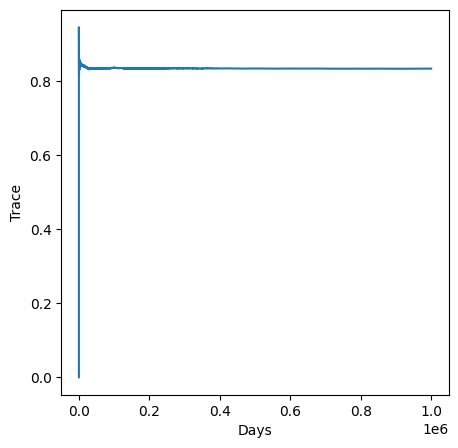

In [2]:
p_1_0 = 0.5 #0 is cloudy, 1 is sunny
p_0_1 = 0.1
p_0_0 = 0.5
p_1_1 = 0.9

trace = []
N = 1000000 # number of days

init_w = 0
trace.append(init_w)
w_current = init_w

for _ in tqdm(range(1, N)):
    
    p = uniform.rvs()

    if w_current == 0:

        if p > 0.5:
            w_current = 1
        else:
            w_current = 0

    elif w_current == 1:

        if p <= 0.9:
            w_current = 1
        else:
            w_current = 0

    trace.append(w_current)
        
unique, counts = np.unique(trace, return_counts=True)
print('Cloudy days = ' + str(counts[0]*100/N) + '%')
print('Sunny days = ' + str(counts[1]*100/N) + '%')

trace = np.cumsum(np.array(trace))/(np.arange(np.array(trace).shape[0])+1)
plt.plot(trace)
plt.xlabel('Days')
plt.ylabel('Trace')
plt.show()

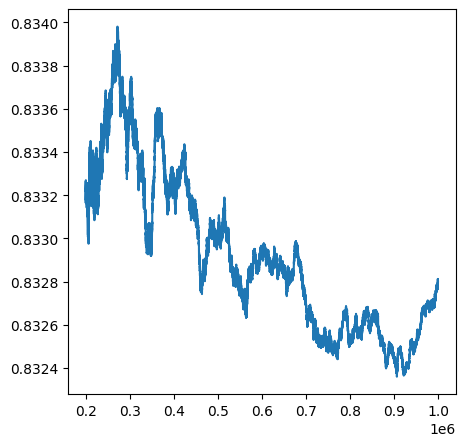

In [9]:
burn_in = 200000
plt.plot(range(burn_in, N), trace[burn_in:])

The median is = 0.8328574021619377
with an error of = 0.00043146146850361715
Minimum and maximum values are: 0.8323594548927741 and 0.8339806788492561


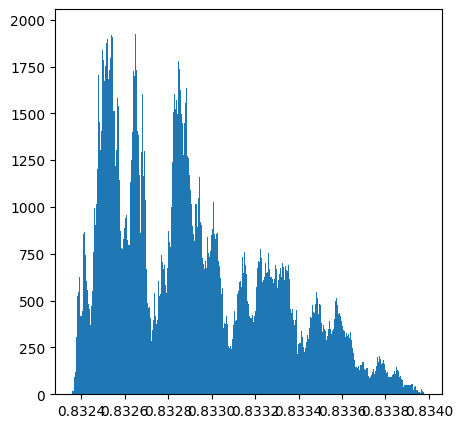

In [10]:
plt.hist(trace[burn_in:], bins = int(np.sqrt(len(trace[burn_in:]))), density = True)

print('The median is = ' + str(np.median(trace[burn_in:])))
print('with an error of = ' + str(astroMLstats.sigmaG(trace[burn_in:])))
print('Minimum and maximum values are: ' + str(min(trace[burn_in:])) + ' and ' + str(max(trace[burn_in:])))

plt.show()

# Stock Market

100%|██████████| 999999/999999 [01:13<00:00, 13697.00it/s]


Bull market = 62.701%
Bear market = 31.085%
Stagnant market = 6.214%


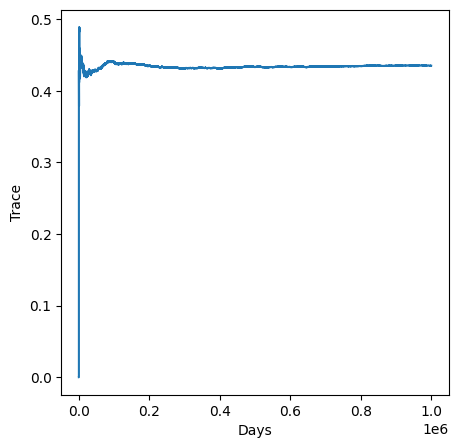

In [11]:
p_0_0 = 0.9 #0 is bull, 1 is bear, 2 is stag
p_1_0 = 0.075
p_2_0 = 0.025
p_0_1 = 0.15
p_1_1 = 0.8
p_2_1 = 0.05
p_0_2 = 0.25
p_1_2 = 0.25
p_2_2 = 0.5

trace = []
N = 1000000 # number of days

init_m = 0 
trace.append(init_m)
m_current = init_m

for _ in tqdm(range(1, N)):
    
    p = uniform.rvs()

    if m_current == 0:

        if p < 0.9:
            m_current = 0
        elif p >= 0.9 and p < 0.975:
            m_current = 1
        else:
            m_current = 2

    elif m_current == 1:

        if p < 0.8:
            m_current = 1
        elif p >= 0.8 and p < 0.95:
            m_current = 0
        else:
            m_current = 2
            
    elif m_current == 2:

        if p < 0.5:
            m_current = 2
        elif p >= 0.5 and p < 0.75:
            m_current = 0
        else:
            m_current = 1

    trace.append(m_current)
        
unique, counts = np.unique(trace, return_counts=True)
print('Bull market = ' + str(counts[0]*100/N) + '%')
print('Bear market = ' + str(counts[1]*100/N) + '%')
print('Stagnant market = ' + str(counts[2]*100/N) + '%')

trace = np.cumsum(np.array(trace))/(np.arange(np.array(trace).shape[0])+1)
plt.plot(trace)
plt.xlabel('Days')
plt.ylabel('Trace')
plt.show()

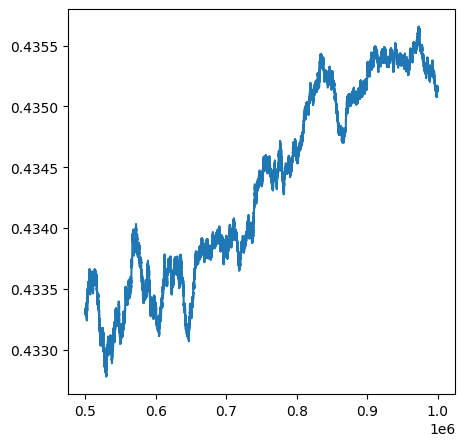

In [17]:
burn_in = 500000
plt.plot(range(burn_in, N), trace[burn_in:])

The median is = 0.4343766409610964
with an error of = 0.0011243066414721025
Minimum and maximum values are: 0.43277949756260636 and 0.43565529386863505


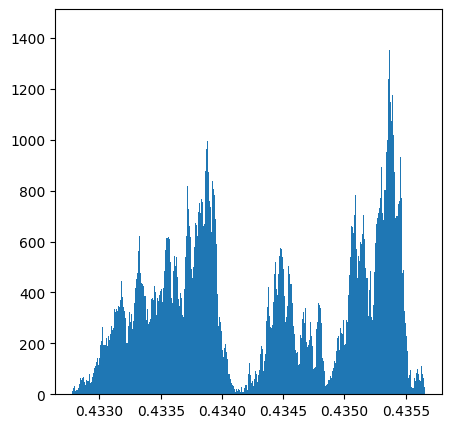

In [18]:
plt.hist(trace[burn_in:], bins = int(np.sqrt(len(trace[burn_in:]))), density = True)

print('The median is = ' + str(np.median(trace[burn_in:])))
print('with an error of = ' + str(astroMLstats.sigmaG(trace[burn_in:])))
print('Minimum and maximum values are: ' + str(min(trace[burn_in:])) + ' and ' + str(max(trace[burn_in:])))

plt.show()